In [21]:
import geopandas as gpd
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import getpass, os
os.environ['PSQL_USER']='dengueadmin'
os.environ['PSQL_HOST']='localhost'
os.environ['PSQL_DB']='dengue'
os.environ['PSQL_PASSWORD']=getpass.getpass("Enter the database password: ")

Enter the database password:  ········


In [3]:
os.chdir('..')
from infodenguepredict.data.infodengue import get_temperature_data, get_alerta_table, get_tweet_data
%matplotlib inline

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


## Fetching data from Infodengue
We can download the data from a full state. Let's pick Goiás.

In [10]:
go = get_alerta_table(state='GO', doenca='dengue')

In [11]:
go

,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,...,pop,tempmin,umidmax,receptivo,transmissao,nivel_inc,umidmed,umidmin,tempmed,tempmax
data_iniSE,,,,,,,,,,,,,,,,,,,,,
2010-02-14,201007,0.0,0,0,0,5221502,0.500000,0.0000,0,1,...,4564.0,20.285714,98.285714,0,0.0,0,None,None,None,None
2010-04-18,201016,0.0,0,0,0,5221502,0.500000,0.0000,0,1,...,4564.0,19.857143,90.142857,0,0.0,0,None,None,None,None
2010-06-13,201024,0.0,0,0,0,5221502,0.500000,0.0000,0,1,...,4564.0,15.000000,76.571429,0,0.0,0,None,None,None,None
2010-07-25,201030,0.0,0,0,0,5221502,0.500000,0.0000,0,1,...,4564.0,15.666667,79.333333,0,0.0,0,None,None,None,None
2010-08-29,201035,0.0,0,0,0,5221502,0.500000,0.0000,0,1,...,4564.0,19.000000,59.571429,0,0.0,0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-04,201845,0.0,0,0,0,5204953,0.000000,0.0000,0,1,...,1830.0,19.142857,96.550471,0,0.0,0,None,None,None,None
2018-12-30,201901,0.0,0,0,0,5204953,0.000000,0.0000,0,1,...,1830.0,19.142857,92.409986,0,0.0,0,None,None,None,None
2019-02-24,201909,1.0,1,1,1,5204953,0.396166,54.6448,0,2,...,1830.0,19.714286,94.847943,1,0.0,0,None,None,None,None


In [7]:
import geopandas as gpd
import geobr

In [13]:
municipios = geobr.read_municipality(code_muni='GO')
municipios

,code_muni,name_muni,code_state,abbrev_state,geometry
0,5200050.0,Abadia De Goiás,52.0,GO,"POLYGON ((-49.41224 -16.74075, -49.40126 -16.7..."
1,5200100.0,Abadiânia,52.0,GO,"POLYGON ((-48.91412 -16.08702, -48.91283 -16.0..."
2,5200134.0,Acreúna,52.0,GO,"POLYGON ((-50.55821 -17.54257, -50.55260 -17.5..."
3,5200159.0,Adelândia,52.0,GO,"POLYGON ((-50.15927 -16.41566, -50.16576 -16.4..."
4,5200175.0,Água Fria De Goiás,52.0,GO,"POLYGON ((-47.85740 -14.76522, -47.85657 -14.7..."
...,...,...,...,...,...
241,5221908.0,Varjão,52.0,GO,"POLYGON ((-49.55947 -17.03987, -49.55595 -17.0..."
242,5222005.0,Vianópolis,52.0,GO,"POLYGON ((-48.54164 -16.74126, -48.53274 -16.7..."
243,5222054.0,Vicentinópolis,52.0,GO,"POLYGON ((-49.90713 -17.61460, -49.90588 -17.6..."
244,5222203.0,Vila Boa,52.0,GO,"POLYGON ((-46.97635 -14.93112, -46.94801 -15.0..."


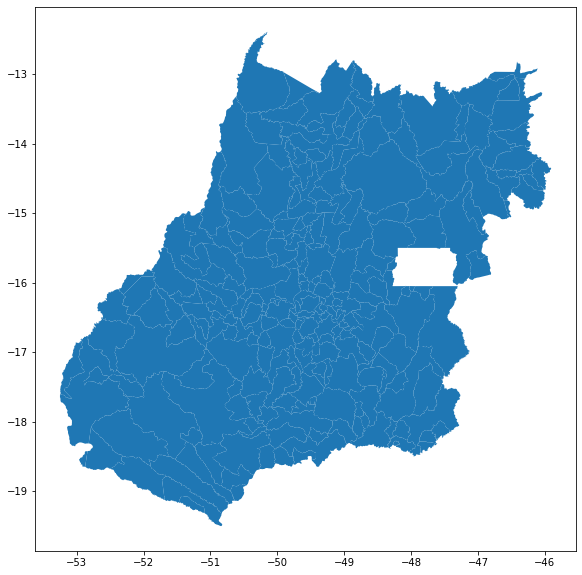

In [14]:
municipios['code_muni'] = municipios.code_muni.astype('int')
municipios.plot(figsize=(10,10));

In [15]:
goias = pd.merge(go.reset_index(), municipios,how='left', left_on='municipio_geocodigo', right_on='code_muni')
goias

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,...,nivel_inc,umidmed,umidmin,tempmed,tempmax,code_muni,name_muni,code_state,abbrev_state,geometry
0,2010-02-14,201007,0.0,0,0,0,5221502,0.500000,0.0000,0,...,0,None,None,None,None,5221502,Turvânia,52.0,GO,"POLYGON ((-50.05671 -16.50789, -50.05407 -16.5..."
1,2010-04-18,201016,0.0,0,0,0,5221502,0.500000,0.0000,0,...,0,None,None,None,None,5221502,Turvânia,52.0,GO,"POLYGON ((-50.05671 -16.50789, -50.05407 -16.5..."
2,2010-06-13,201024,0.0,0,0,0,5221502,0.500000,0.0000,0,...,0,None,None,None,None,5221502,Turvânia,52.0,GO,"POLYGON ((-50.05671 -16.50789, -50.05407 -16.5..."
3,2010-07-25,201030,0.0,0,0,0,5221502,0.500000,0.0000,0,...,0,None,None,None,None,5221502,Turvânia,52.0,GO,"POLYGON ((-50.05671 -16.50789, -50.05407 -16.5..."
4,2010-08-29,201035,0.0,0,0,0,5221502,0.500000,0.0000,0,...,0,None,None,None,None,5221502,Turvânia,52.0,GO,"POLYGON ((-50.05671 -16.50789, -50.05407 -16.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156643,2018-11-04,201845,0.0,0,0,0,5204953,0.000000,0.0000,0,...,0,None,None,None,None,5204953,Campos Verdes,52.0,GO,"POLYGON ((-49.68384 -14.34479, -49.68825 -14.3..."
156644,2018-12-30,201901,0.0,0,0,0,5204953,0.000000,0.0000,0,...,0,None,None,None,None,5204953,Campos Verdes,52.0,GO,"POLYGON ((-49.68384 -14.34479, -49.68825 -14.3..."
156645,2019-02-24,201909,1.0,1,1,1,5204953,0.396166,54.6448,0,...,0,None,None,None,None,5204953,Campos Verdes,52.0,GO,"POLYGON ((-49.68384 -14.34479, -49.68825 -14.3..."
156646,2019-03-31,201914,0.0,0,0,0,5204953,0.000000,0.0000,0,...,0,None,None,None,None,5204953,Campos Verdes,52.0,GO,"POLYGON ((-49.68384 -14.34479, -49.68825 -14.3..."


In [16]:
goias = gpd.GeoDataFrame(goias)

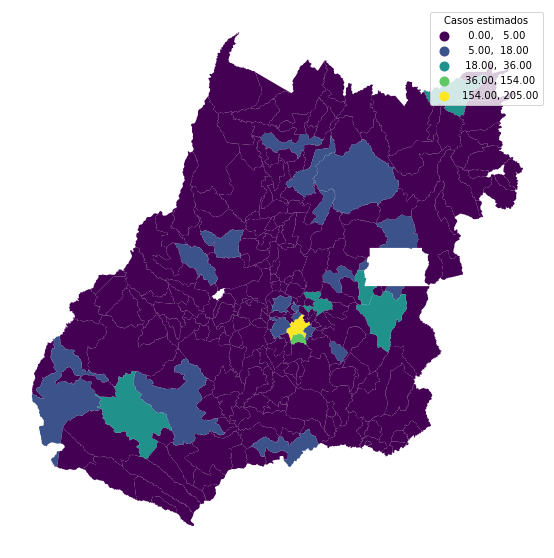

In [17]:
ax = goias[goias.SE==202144].plot(figsize=(10,10),
                             column='casos_est',
                             scheme="naturalbreaks",
                             legend=True,
                             legend_kwds={'title': "Casos estimados"},

                             );
ax.set_axis_off();

## Building the dashboard

In [103]:
from functools import lru_cache
from IPython.display import display, Markdown
import pandas_bokeh
pandas_bokeh.output_notebook()
pd.options.plotting.backend = "pandas_bokeh"

Loading BokehJS ...

In [96]:
@lru_cache(maxsize=27)
def get_dados(sigla='PR', doenca='dengue'):
    df = get_alerta_table(state=sigla, doenca=doenca)
    municipios = geobr.read_municipality(code_muni=sigla)
    municipios['code_muni'] = municipios.code_muni.astype('int')
    dados = pd.merge(df.reset_index(), municipios,how='left', left_on='municipio_geocodigo', right_on='code_muni')
    dados = dados.sort_values('SE')
    return gpd.GeoDataFrame(dados)


def gera_SE_seq(anoi, anof):
    ses=[]
    for a in range(anoi,anof+1):
        for w in range(1,52):
            w = str(w).zfill(2)
            ses.append(int(f'{a}{w}'))
    return ses

In [81]:
estado='TO'
gdf = get_dados(estado)
try:
    gdf.set_index('data_iniSE', inplace=True)
except KeyError:
    pass
munis = list(set(gdf.name_muni))
try: 
    munis = sorted(munis)
except: pass

In [76]:
@interact
def painel(mun=widgets.Select(options=munis, description='Municipio'), 
           week=widgets.SelectionSlider(options=gera_SE_seq(2021,2022), description='SE'), 
           ):
    week = gdf.SE.max() if week > gdf.SE.max() else week
    # fig, axs = plt.subplot_mosaic([['a', 'c'], ['b', 'c'], ['d', 'd']],
    #                               figsize=(20, 20),
    #                               constrained_layout=True)
    
    umid = pd.DataFrame(gdf.reset_index())[['data_iniSE','umidmin', 'umidmax']].plot_bokeh(kind='line', x='data_iniSE')
    temp = pd.DataFrame(gdf.reset_index())[['data_iniSE','tempmin','tempmax']].plot_bokeh(kind='line', x='data_iniSE')
    mapplot = gdf[gdf.SE==int(week)].plot_bokeh(simplify_shapes=5000,
                                                dropdown=['casos_est','casos','p_inc100k','nivel'],
                                                colormap='Viridis', 
                                                  hovertool_string=f"""<h1>@name_muni</h1>
                                                <h3>Casos: @casos </h3>""",
                                                 )
    cases = pd.DataFrame(gdf[gdf.name_muni==mun].reset_index())[['data_iniSE','casos','casos_est']].plot_bokeh(kind='line', x='data_iniSE')
    # tmax = pd.DataFrame(gdf.reset_index()).plot_bokeh(kind='line', x='data_iniSE', y='tempmax')
    # for label, ax in axs.items():
    # # fig,[ax1,ax2] = plt.subplots(1,2,figsize=(20, 10))
    #     if label == 'a':
    #         pd.DataFrame(gdf.reset_index()).plot_bokeh(kind='line', ax=ax, x='data_iniSE', y='umidmin', label='mínima')
    #         # gdf.umidmax.plot(ax=ax, label='máxima')
    #         ax.set_title('Umidade')
    #         ax.legend()
    #     elif label == 'b':
    #         gdf.tempmin.plot(ax=ax, label='mínima')
    #         gdf.tempmax.plot(ax=ax, label='máxima')
    #         ax.set_title('Temperatura')
    #         ax.legend()
    #     elif label == 'c':
    #         gdf[gdf.SE==int(week)].plot(ax=ax,column=variable,scheme="User_defined",
    #                          legend=True,
    #                         classification_kwds=dict(bins=[20,50,100,500,2000,5000]),
    #                          legend_kwds={'title': "Casos estimados",'loc':'lower right'})
    #         ax.set_axis_off();
    #         ax.set_title(str(week));
    #     elif label == 'd':
    #         gdf[gdf.name_muni==mun].casos.plot(label='casos')
    #         gdf[gdf.name_muni==mun].casos_est.plot(label='casos_est')
    #         # sns.lineplot(data=gdf[gdf.name_muni==mun].reset_index(),x='data_iniSE', y='casos', ax=ax)
    #         # sns.lineplot(data=gdf[gdf.name_muni==mun].reset_index(),x='data_iniSE', y='casos_est', ax=ax)
    #         ax.set_title(mun)
#     ax2.vlines(x=gdf[gdf.SE==int(week)].index,ymin=0,ymax=500)
    # plt.show();
    mapplot.width = 900
    umid.width = 450
    temp.width = 450
    cases.width = 900

    layout = pandas_bokeh.column(mapplot,
                    pandas_bokeh.row(umid, temp),
                    cases)
    pandas_bokeh.plot_grid(layout, width=1200)

KeyError: "None of ['data_iniSE'] are in the columns"

In [ ]:
estado='CE'
doenca='chik'
doenca='dengue'
gdf = get_dados(estado, doenca)
try:
    gdf.set_index('data_iniSE', inplace=True)
except KeyError:
    pass
munis = list(set(gdf.name_muni))
try: 
    munis = sorted(munis)
except: pass

In [105]:
pd.options.plotting.backend = "matplotlib"

@interact
def painel(mun=widgets.Select(options=munis, description='Municipio'), 
           week=widgets.SelectionSlider(options=gera_SE_seq(2021,2022), value=202215, description='SE'),
           variable=['casos','casos_est']
           ):
    week = gdf.SE.max() if week > gdf.SE.max() else week
    display(Markdown(f"# {doenca}"))
    fig, axs = plt.subplot_mosaic([['a', 'c'], ['b', 'c'], ['d', 'd']],
                                  figsize=(20, 20),
                                  constrained_layout=True)
    
    for label, ax in axs.items():
        if label == 'a':
            gdf[gdf.SE>=202101].umidmax.plot(kind='area',ax=ax,alpha=0.3, label='máxima')
            gdf[gdf.SE>=202101].umidmin.plot(kind='area',ax=ax,alpha=0.3, label='mínima')
            ax.set_title('Umidade')
            ax.legend()
        elif label == 'b':
            gdf[gdf.SE>=202101].tempmin.plot(ax=ax, label='mínima')
            # gdf.tempmax.plot(ax=ax, label='máxima')
            ax.set_title('Temperatura')
            ax.legend()
        elif label == 'c':
            leg = 'Casos estimados' if variable=='casos_est' else 'Casos notificados'
            gdf[gdf.SE==int(week)].plot(ax=ax,column=variable,scheme="User_defined",
                             legend=True,
                            classification_kwds=dict(bins=[20,50,100,500,2000,5000]),
                             legend_kwds={'title': f"{leg}",'loc':'lower right'})
            ax.set_axis_off();
            ax.set_title(str(week));
        elif label == 'd':
            gdf[(gdf.name_muni==mun)&(gdf.SE>=202101)].casos.plot(ax=ax,label='casos')
            gdf[(gdf.name_muni==mun)&(gdf.SE>=202101)].casos_est.plot(ax=ax,label='casos_est')
            ax.legend()
            ax.vlines(x=gdf[gdf.SE==int(week)].index,ymin=0,ymax=500)
            ax.set_title(mun)
    
    plt.show();

interactive(children=(Select(description='Municipio', options=('Abaiara', 'Acarape', 'Acaraú', 'Acopiara', 'Ai…